In [1]:
#Importo las librerias necesarias
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import numpy as np

## Visualización de curvas de potencia

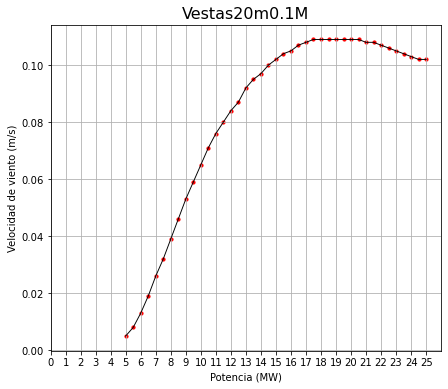

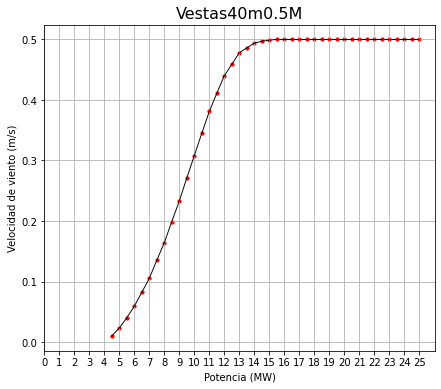

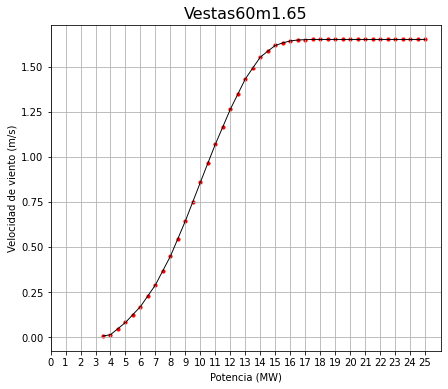

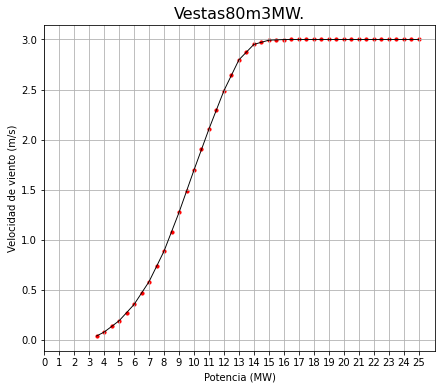

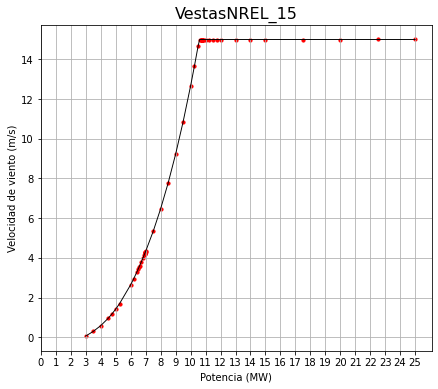

In [12]:
curvas = glob.glob('../data/Vestas*.xlsx')
for i in curvas:
    curva = pd.read_excel(i, header=None) #curva son los datos de la curva de potencia de cada uno de los aeoregeneradores
    from scipy.interpolate import interp1d
    
    f = interp1d(curva[0],curva[1])
    
    def potencia(vel):
        if ((vel>=curva[0].min()) & (vel<=curva[0].max())):
            return f(vel)
        return 0

    plt.figure(figsize=(7,6)) #Iteramos y graficamos todas las curvas de potencia
    plt.scatter(curva[0],curva[1], color="red", s=10)
    plt.plot(curva[0],curva[0].apply(potencia), color="black", linewidth=0.94)
    plt.title(i[8:21], fontsize=16)
    plt.xticks(range(26))
    plt.xlabel("Potencia (MW)")
    plt.ylabel("Velocidad de viento (m/s)")
    plt.grid()

## Importación de datos de viento

In [5]:
paths = glob.glob('../data/Ventosa/M04_*.txt')
DataVen = pd.DataFrame() # Crea un DataFrame vacio en el que guardare todos los data (datos de viento mensuales)

for path in paths:
    def read_AEM(path):
        data = pd.read_csv(path,skiprows=[1,2],sep=' ') #data representa los datos de viento mensuales
  
        #Arreglo la estampa temporal
        year = data['YYYY'].apply(str)
        month = data['MM'].apply(str).str.zfill(2)
        day = data['DD'].apply(str).str.zfill(2)
        hour = data['hh'].apply(str).str.zfill(2)
        minute = data['mm'].apply(str).str.zfill(2)

        dates = year + '-' + month + '-' + day + ' ' + hour + ':' + minute
        data['date'] = pd.to_datetime(dates)

        new_cols = ['WS_80mA_mean','WS_80mB_mean','WS_60m_mean','WS_40m_mean','WS_20m_mean','WD_78m_mean','WD_58m_mean']
        new_data = data[new_cols]
        new_data.index = data['date']
    
        return new_data


    DataVen = pd.concat([DataVen,read_AEM(path)])
    
DataVen.sort_index(inplace=True) #Ordeno  la estampa temporal
DataVen

,WS_80mA_mean,WS_80mB_mean,WS_60m_mean,WS_40m_mean,WS_20m_mean,WD_78m_mean,WD_58m_mean
date,,,,,,,
2018-01-01 00:00:00,9.1229,9.2334,8.6563,8.3023,7.1442,340.1,340.6
2018-01-01 00:10:00,10.4760,10.4880,9.7306,9.1236,7.8031,339.8,340.8
2018-01-01 00:20:00,10.0540,10.0400,9.5133,8.9556,8.0392,341.7,342.6
2018-01-01 00:30:00,11.0280,11.1080,10.3020,9.8579,8.4246,334.5,336.6
2018-01-01 00:40:00,12.3870,12.5610,11.8230,11.0520,9.7422,335.7,337.3
...,...,...,...,...,...,...,...
2020-08-31 23:20:00,2.5394,2.6061,2.8377,3.1677,2.6911,130.6,116.7
2020-08-31 23:30:00,2.7151,2.7737,2.9048,3.5143,3.3262,134.6,120.1
2020-08-31 23:40:00,2.9118,2.9569,3.1668,3.6450,3.0329,131.2,119.4


## Calculo de factor de planta

In [19]:
#HEAT MAP DE LOS FACTORES DE PLANTA CON DATOS REALES

velocidades = ['WS_80mA_mean','WS_80mB_mean','WS_60m_mean','WS_40m_mean','WS_20m_mean']
cf = []

for i in curvas:
    curva = pd.read_excel(i, header=None) #curva son los datos de la curva de potencia de cada uno de los aeoregeneradores
    from scipy.interpolate import interp1d
    
    f = interp1d(curva[0],curva[1])
    
    def potencia(vel):
        if ((vel>=curva[0].min()) & (vel<=curva[0].max())):
            return f(vel)
        return 0

    for j in velocidades:
        cf.append(((DataVen[j].apply(potencia))*(1/6)).sum()/((curva[1].max())*len(DataVen)*(1/6)))  #Factor de planta
    



In [20]:
cf

[0.42816181440365025,
 0.3472759061701287,
 0.40280940977230656,
 0.36983197894949943,
 0.2940233832440819,
 0.44962553060046684,
 0.36513080286017396,
 0.42291635273923195,
 0.3878482913643114,
 0.3064117252450668,
 0.4131442008860084,
 0.33365256717525343,
 0.38633470786798596,
 0.35177585686013546,
 0.2728590693954182,
 0.4365305661305609,
 0.35352742259070646,
 0.40986792923898435,
 0.374920831416649,
 0.29429348159063584]

Text(33.0, 0.5, 'Potencia nominal (MW)')

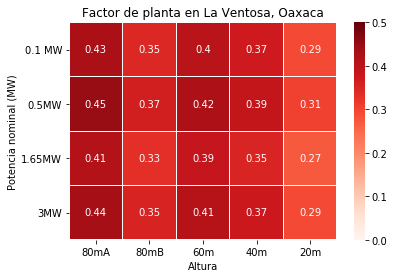

In [21]:
#HEATMAP DEL FACTOR DE PLANTA EN FUNCIÓN DE LA ALTURA Y DEL AEROGENERADOR USANDO LOS DATOS REALES (NO EXTRAPOLADOS)
cf = np.reshape(cf,(4,5))
sns.heatmap(cf,cmap="Reds",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)
plt.title("Factor de planta en La Ventosa, Oaxaca",fontsize=12)
plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)")   

## Calculo de alpha 1

El cálculo de alpha 1 se realiza haciendo uso de la siguiente ecuación, donde se obtienen 3 valores del parámetro de corte para cada una de las alturas: 


$\alpha = \bar{\alpha}(t) = \frac{ \log \left( \frac{u(z,t)}{u(z_{ref},t)}\right)}{\log \left( \frac{z}{z_{ref}} \right)}$

$\alpha$ es el coeficiente de cizalladura, $u(z)$ es la serie de velocidades a la altura $z$, y $u(z_{ref})$ es la serie de velocidades a la altura $z_{ref}$.

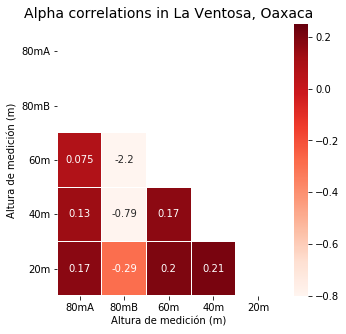

In [5]:
#Coeficiente de cizalladura usando todos los valores de las series temporales

datos = [['WS_80mA_mean',80],['WS_80mB_mean',80],['WS_60m_mean',60],['WS_40m_mean',40],['WS_20m_mean',20]]
rango = [0,1,2,3,4]
lista = []
for i in rango:
        for j in rango:
            alpha = (np.log(DataVen[datos[i][0]]/DataVen[datos[j][0]])/np.log(datos[i][1]/datos[j][1])).mean()
            lista.append(alpha)
matrix = np.reshape(lista,(5,5))
mask = np.zeros_like(matrix);
mask[np.triu_indices_from(mask,k=1)] = True;

plt.figure(figsize=(5,5))
sns.heatmap(matrix, mask=mask,cmap="Reds",annot=True,vmax=0.25,vmin=-0.8, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.title('Alpha correlations in La Ventosa, Oaxaca',fontsize=14)
plt.xlabel("Altura de medición (m)")
plt.ylabel("Altura de medición (m)")

plt.show()           

## Calculo de alpha 2

El cálculo de alpha 2 se hace con la siguiente ecuación, donde nuevamente se obtienen 3 valores del parámetro de corte para cada altura.

 $\alpha = \frac{ \log \left( \frac{\bar{u}(z,t)}{\bar{u}(z_{ref},t)}\right)}{\log \left( \frac{z}{z_{ref}} \right)}$  

Donde $\bar{u}(z,t)$ es el valor promedio de la velocidad a la altura $z$, y es $\bar{u}(z_{ref},t)$ el valor promedio de la velocidad a la altura $z_{ref}$.

C:\Users\MpBailon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\MpBailon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


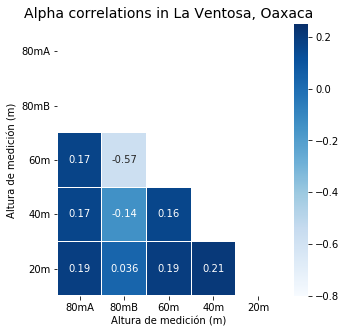

In [93]:
#Coeficiente de cizalladura con promedio de velocidad de series temporales

datos = [['WS_80mA_mean',80],['WS_80mB_mean',80],['WS_60m_mean',60],['WS_40m_mean',40],['WS_20m_mean',20]]
rango = [0,1,2,3,4]
lista2 = []
for i in rango:
        for j in rango:
            alpha2 = (np.log(DataVen[datos[i][0]].mean()/DataVen[datos[j][0]].mean())/np.log(datos[i][1]/datos[j][1]))
            lista2.append(alpha2)
matrix2 = np.reshape(lista2,(5,5))
mask2 = np.zeros_like(matrix2);
mask2[np.triu_indices_from(mask2,k=1)] = True;

plt.figure(figsize=(5,5))
sns.heatmap(matrix2, mask=mask2,cmap="Blues",annot=True,vmax=0.25,vmin=-0.8, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.title('Alpha correlations in La Ventosa, Oaxaca',fontsize=14)
plt.xlabel("Altura de medición (m)")
plt.ylabel("Altura de medición (m)")

plt.show()    

In [7]:
#ELIGIENDO UN VALOR REPRESENTATIVO ÚNICO DE ALPHA
alpha_general2 = np.delete(lista2, (0,1,2,3,4,5,6,7,8,9,11,12,13,14,16,18,19,21,24)).mean()
alpha_general = np.delete(lista, (0,1,2,3,4,5,6,7,8,9,11,12,13,14,16,18,19,21,24)).mean()

In [8]:
alpha_general #Representa el valor de alpha representativo con series temporales

0.1599690858864494

In [9]:
alpha_general2 #Representa el valor de alpha representativo con promedio de velocidad de series temporales

0.18222962381253996

In [62]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
# x = ((DataVen['WS_80mA_mean'] - DataVen["WS_60m_mean"]*((80/60)**alpha_general2))/DataVen['WS_80mA_mean'])

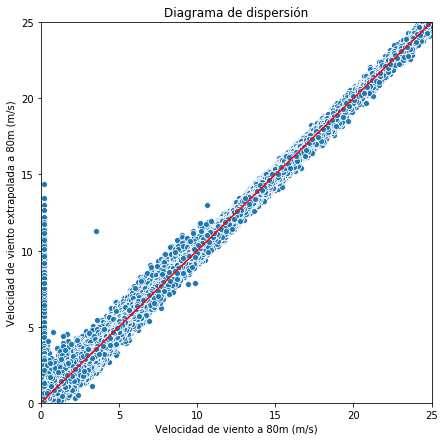

In [17]:
#VISUALIZACIÓN DE VALORES DE SERIES Y REALES VS SERIES EXTRAPOLADAS

x = np.linspace(0,25,1000)

plt.figure(figsize=(7,7))
sns.scatterplot(DataVen['WS_80mA_mean'],DataVen["WS_60m_mean"]*((80/60)**alpha_general2))
plt.plot(x,x,color='r')
plt.xlim([0,25])
plt.ylim([0,25])
plt.xlabel('Velocidad de viento a 80m (m/s)')
plt.ylabel('Velocidad de viento extrapolada a 80m (m/s)')
plt.title('Diagrama de dispersión')
plt.show()

In [41]:
#USANDO ALPHA GENERAL
#ESTE CÓDIGO CALCULA LOS ERRORES Y LOS FACTORES DE PLANTA DE TODAS LAS SERIES EXTRAPOLADAS PARA CADA UNA DE LAS TURBINAS 

datos = [['WS_80mA_mean',80],['WS_80mB_mean',80],['WS_60m_mean',60],['WS_40m_mean',40],['WS_20m_mean',20]]
rango = [0,1,2,3,4]
velocidades = ['WS_80mA_mean','WS_80mB_mean','WS_60m_mean','WS_40m_mean','WS_20m_mean']
curvas = glob.glob('DATACSV/Aerogeneradores/Vestas*.xlsx')


factor_final = []
data_final = []
for i in rango:
    data_extrapolacion_parcial = []
    xs_series = []
    for j in rango:
        
        xs = DataVen[datos[i][0]]*((datos[j][1]/datos[i][1])**alpha_general)
        
        
        error_squared = mean_squared_error(DataVen[datos[j][0]],xs)
        data_extrapolacion_parcial.append(error_squared)
    
        error_absolute = mean_absolute_error(DataVen[datos[j][0]],xs)
        data_extrapolacion_parcial.append(error_absolute)
    
        pearson = np.corrcoef(DataVen[datos[j][0]],xs)[0,1]
        data_extrapolacion_parcial.append(pearson)  
        
        xs_series.append(xs)
        
    
    factor_parcial = []
    for m in curvas:
        curva = pd.read_excel(m, header=None) #curva son los datos de la curva de potencia de cada uno de los aeoregeneradores
        from scipy.interpolate import interp1d
    
        f = interp1d(curva[0],curva[1])
    
        def potencia(vel):
            if ((vel>=curva[0].min()) & (vel<=curva[0].max())):
                return f(vel)
            return 0

        for n in rango: 
            factor_parcial.append(((xs_series[n].apply(potencia))*(1/6)).sum()/((curva[1].max())*len(DataVen)*(1/6)))
        
                                   
    np.reshape(data_extrapolacion_parcial,(5,3))                        
    data_final.append(data_extrapolacion_parcial)
    factor_final.append(factor_parcial)

for k in rango:
    print(pd.DataFrame(np.reshape(data_final[k],(5,3)),columns=['Error squared', 'Mean Error', 'Pearson Corr'],index=["80mA","80mB","60m","40m","20m"]))
factor_final    

      Error squared  Mean Error  Pearson Corr
80mA       0.000000    0.000000      1.000000
80mB      23.652344    1.825361      0.667948
60m        0.222352    0.256690      0.995844
40m        0.391502    0.417844      0.991547
20m        0.631258    0.600120      0.985534
      Error squared  Mean Error  Pearson Corr
80mA      23.652344    1.825361      0.667948
80mB       0.000000    0.000000      1.000000
60m       21.381733    1.857697      0.666152
40m       19.113630    1.891671      0.660737
20m       14.448051    1.826293      0.657261
      Error squared  Mean Error  Pearson Corr
80mA       0.243789    0.268779      0.995844
80mB      23.443129    1.945186      0.666152
60m        0.000000    0.000000      1.000000
40m        0.089789    0.220858      0.998046
20m        0.324622    0.447943      0.993200
      Error squared  Mean Error  Pearson Corr
80mA       0.488703    0.466841      0.991547
80mB      23.859105    2.113494      0.660737
60m        0.102226    0.235658   

[[0.42816181440365025,
  0.42816181440365025,
  0.4062382891657586,
  0.3736523017863269,
  0.31524394335783745,
  0.44962553060046684,
  0.44962553060046684,
  0.4267700874470313,
  0.3922989520523601,
  0.3295322695720981,
  0.4131442008860084,
  0.4131442008860084,
  0.3901374005566882,
  0.3559278816228496,
  0.295015980124663,
  0.4365305661305609,
  0.4365305661305609,
  0.41367231891157175,
  0.37934908269411954,
  0.31732267453640783],
 [0.3472759061701287,
  0.3472759061701287,
  0.32824375877042855,
  0.3003723466908514,
  0.2511695433381942,
  0.36513080286017396,
  0.36513080286017396,
  0.34509680465333253,
  0.3153040527496164,
  0.26190635769988024,
  0.33365256717525343,
  0.33365256717525343,
  0.3135692642680603,
  0.284172436844965,
  0.232863554602628,
  0.35352742259070646,
  0.35352742259070646,
  0.33348649145775633,
  0.3038396101040245,
  0.2512800353087428],
 [0.4248314524233554,
  0.4248314524233554,
  0.40280940977230656,
  0.3699686824355404,
  0.3115755694

In [42]:
factor_final

[[0.42816181440365025,
  0.42816181440365025,
  0.4062382891657586,
  0.3736523017863269,
  0.31524394335783745,
  0.44962553060046684,
  0.44962553060046684,
  0.4267700874470313,
  0.3922989520523601,
  0.3295322695720981,
  0.4131442008860084,
  0.4131442008860084,
  0.3901374005566882,
  0.3559278816228496,
  0.295015980124663,
  0.4365305661305609,
  0.4365305661305609,
  0.41367231891157175,
  0.37934908269411954,
  0.31732267453640783],
 [0.3472759061701287,
  0.3472759061701287,
  0.32824375877042855,
  0.3003723466908514,
  0.2511695433381942,
  0.36513080286017396,
  0.36513080286017396,
  0.34509680465333253,
  0.3153040527496164,
  0.26190635769988024,
  0.33365256717525343,
  0.33365256717525343,
  0.3135692642680603,
  0.284172436844965,
  0.232863554602628,
  0.35352742259070646,
  0.35352742259070646,
  0.33348649145775633,
  0.3038396101040245,
  0.2512800353087428],
 [0.4248314524233554,
  0.4248314524233554,
  0.40280940977230656,
  0.3699686824355404,
  0.3115755694

Text(33.0, 0.5, 'Potencia nominal')

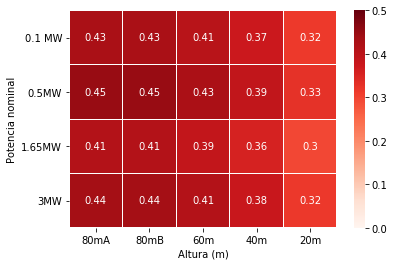

In [104]:
Extra_80A = np.reshape(factor_final[0],(4,5))
sns.heatmap(Extra_80A,cmap="Reds",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)
plt.xlabel("Altura (m)")
plt.ylabel("Potencia nominal") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

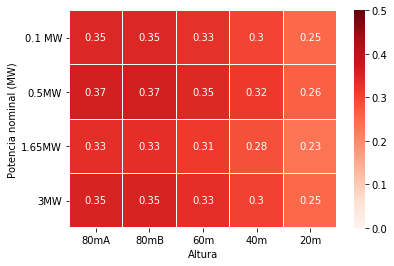

In [105]:
Extra_80B = np.reshape(factor_final[1],(4,5))
sns.heatmap(Extra_80B,cmap="Reds",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)
plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

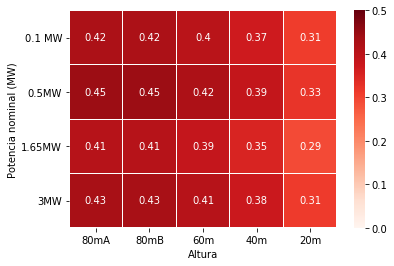

In [106]:
Extra_60 = np.reshape(factor_final[2],(4,5))
sns.heatmap(Extra_60,cmap="Reds",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)
plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

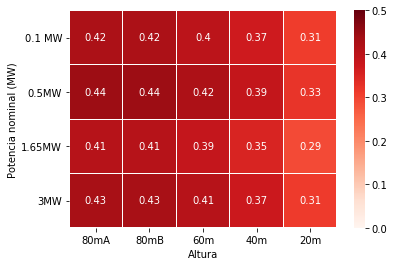

In [107]:
Extra_40 = np.reshape(factor_final[3],(4,5))
sns.heatmap(Extra_40,cmap="Reds",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)
plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

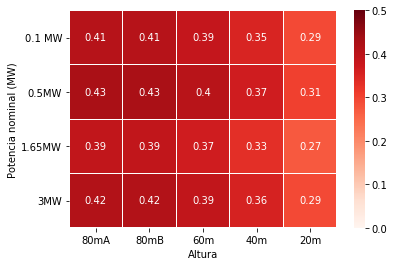

In [108]:
Extra_20 = np.reshape(factor_final[4],(4,5))
sns.heatmap(Extra_20,cmap="Reds",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)
plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

In [63]:
datos = [['WS_80mA_mean',80],['WS_80mB_mean',80],['WS_60m_mean',60],['WS_40m_mean',40],['WS_20m_mean',20]]
rango = [0,1,2,3,4]
velocidades = ['WS_80mA_mean','WS_80mB_mean','WS_60m_mean','WS_40m_mean','WS_20m_mean']
curvas = glob.glob('DATACSV/Aerogeneradores/Vestas*.xlsx')


factor_final2 = []
data_final2 = []
for i in rango:
    data_extrapolacion_parcial2 = []
    xs_series2 = []
    for j in rango:
        
        xs2 = DataVen[datos[i][0]]*((datos[j][1]/datos[i][1])**0.18222962381253996)
        
        
        error_squared2 = mean_squared_error(DataVen[datos[j][0]],xs2)
        data_extrapolacion_parcial2.append(error_squared2)
    
        error_absolute2 = mean_absolute_error(DataVen[datos[j][0]],xs2)
        data_extrapolacion_parcial2.append(error_absolute2)
    
        pearson2 = np.corrcoef(DataVen[datos[j][0]],xs2)[0,1]
        data_extrapolacion_parcial2.append(pearson2)  
        
        xs_series2.append(xs2)
        
    
    factor_parcial2 = []
    for m in curvas:
        curva = pd.read_excel(m, header=None) #curva son los datos de la curva de potencia de cada uno de los aeoregeneradores
        from scipy.interpolate import interp1d
    
        f = interp1d(curva[0],curva[1])
    
        def potencia(vel):
            if ((vel>=curva[0].min()) & (vel<=curva[0].max())):
                return f(vel)
            return 0

        for n in rango: 
            factor_parcial2.append(((xs_series2[n].apply(potencia))*(1/6)).sum()/((curva[1].max())*len(DataVen)*(1/6)))
        
                                   
    np.reshape(data_extrapolacion_parcial2,(5,3))                        
    data_final2.append(data_extrapolacion_parcial2)
    factor_final2.append(factor_parcial2)

for k in rango:
    print(pd.DataFrame(np.reshape(data_final2[k],(5,3)),columns=['Error squared', 'Mean Error', 'Pearson Corr'],index=["80mA","80mB","60m","40m","20m"]))
factor_final2    

      Error squared  Mean Error  Pearson Corr
80mA       0.000000    0.000000      1.000000
80mB      23.652344    1.825361      0.667948
60m        0.217556    0.250396      0.995844
40m        0.393653    0.422689      0.991547
20m        0.506422    0.522269      0.985534
      Error squared  Mean Error  Pearson Corr
80mA      23.652344    1.825361      0.667948
80mB       0.000000    0.000000      1.000000
60m       21.381605    1.851057      0.666152
40m       19.120870    1.894174      0.660737
20m       14.360111    1.761791      0.657261
      Error squared  Mean Error  Pearson Corr
80mA       0.241606    0.263873      0.995844
80mB      23.745175    1.950686      0.666152
60m        0.000000    0.000000      1.000000
40m        0.097898    0.235255      0.998046
20m        0.241557    0.378974      0.993200
      Error squared  Mean Error  Pearson Corr
80mA       0.506789    0.479598      0.991547
80mB      24.616189    2.149198      0.660737
60m        0.113489    0.253296   

[[0.42816181440365025,
  0.42816181440365025,
  0.40319199187263266,
  0.36560991508293933,
  0.2991231550812536,
  0.44962553060046684,
  0.44962553060046684,
  0.42358262405884234,
  0.38373058484423417,
  0.3120221137388075,
  0.4131442008860084,
  0.4131442008860084,
  0.3869487968343454,
  0.34750250947858596,
  0.2783796517213408,
  0.4365305661305609,
  0.4365305661305609,
  0.4104894283711878,
  0.37083863461497524,
  0.30019734109267626],
 [0.3472759061701287,
  0.3472759061701287,
  0.3256058627425666,
  0.29358390435438114,
  0.23765330046602717,
  0.36513080286017396,
  0.36513080286017396,
  0.3422952019159957,
  0.3079952001551333,
  0.24712061265786522,
  0.33365256717525343,
  0.33365256717525343,
  0.31077689744738285,
  0.2770423580197308,
  0.21898035933669588,
  0.35352742259070646,
  0.35352742259070646,
  0.330683862362858,
  0.2965950529308434,
  0.23689738518348905],
 [0.4276569159786394,
  0.4276569159786394,
  0.40280940977230656,
  0.3652514911312397,
  0.298

Text(33.0, 0.5, 'Potencia nominal (MW)')

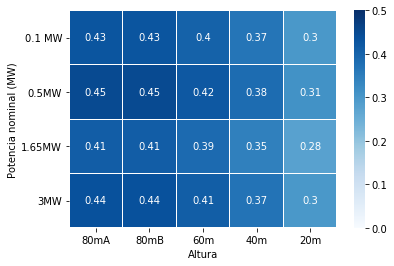

In [109]:
Extra_80A = np.reshape(factor_final2[0],(4,5))
sns.heatmap(Extra_80A,cmap="Blues",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)

plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

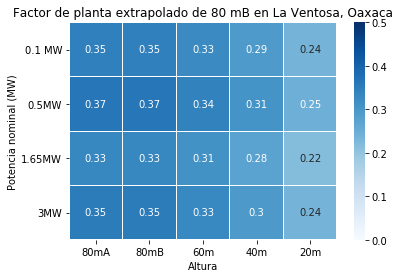

In [65]:
Extra_80B = np.reshape(factor_final2[1],(4,5))
sns.heatmap(Extra_80B,cmap="Blues",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)
plt.title("Factor de planta extrapolado de 80 mB en La Ventosa, Oaxaca",fontsize=12)
plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

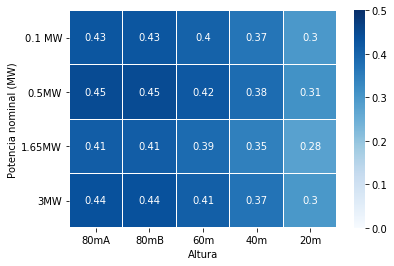

In [110]:
Extra_60 = np.reshape(factor_final2[2],(4,5))
sns.heatmap(Extra_60,cmap="Blues",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)
plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

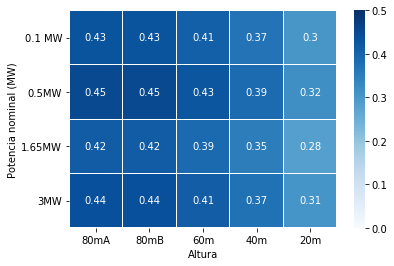

In [112]:
Extra_40 = np.reshape(factor_final2[3],(4,5))
sns.heatmap(Extra_40,cmap="Blues",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)

plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

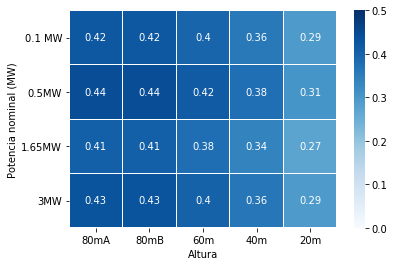

In [111]:
Extra_20 = np.reshape(factor_final2[4],(4,5))
sns.heatmap(Extra_20,cmap="Blues",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)

plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

In [98]:
datos = [['WS_80mA_mean',80],['WS_80mB_mean',80],['WS_60m_mean',60],['WS_40m_mean',40],['WS_20m_mean',20]]
rango = [0,1,2,3,4]
lista_j = []
for j in rango:
    alpha_justus = ((0.37-0.088*np.log(DataVen[datos[i][0]]))/(1-0.088*np.log(datos[j][1]/10))).mean()
    lista_j.append(alpha_justus)
lista_j

[0.2682818477190022,
 0.2682818477190022,
 0.26021865605823313,
 0.24964373685793162,
 0.23342706212271538]

In [99]:
lista_j = np.delete(lista_j, (1))
lista_j

array([0.26828185, 0.26021866, 0.24964374, 0.23342706])

In [100]:
alpha_jus = lista_j.mean()
alpha_jus

0.2528928256894706

In [86]:
datos = [['WS_80mA_mean',80],['WS_80mB_mean',80],['WS_60m_mean',60],['WS_40m_mean',40],['WS_20m_mean',20]]
rango = [0,1,2,3,4]
velocidades = ['WS_80mA_mean','WS_80mB_mean','WS_60m_mean','WS_40m_mean','WS_20m_mean']
curvas = glob.glob('DATACSV/Aerogeneradores/Vestas*.xlsx')


factor_final3 = []
data_final3 = []
for i in rango:
    data_extrapolacion_parcial3 = []
    xs_series3 = []
    for j in rango:
        
        xs3 = DataVen[datos[i][0]]*((datos[j][1]/datos[i][1])**alpha_jus)
        
        
        error_squared3 = mean_squared_error(DataVen[datos[j][0]],xs3)
        data_extrapolacion_parcial3.append(error_squared3)
    
        error_absolute3 = mean_absolute_error(DataVen[datos[j][0]],xs3)
        data_extrapolacion_parcial3.append(error_absolute3)
    
        pearson3 = np.corrcoef(DataVen[datos[j][0]],xs3)[0,1]
        data_extrapolacion_parcial3.append(pearson3)  
        
        xs_series3.append(xs3)
        
    
    factor_parcial3 = []
    for m in curvas:
        curva = pd.read_excel(m, header=None) #curva son los datos de la curva de potencia de cada uno de los aeoregeneradores
        from scipy.interpolate import interp1d
    
        f = interp1d(curva[0],curva[1])
    
        def potencia(vel):
            if ((vel>=curva[0].min()) & (vel<=curva[0].max())):
                return f(vel)
            return 0

        for n in rango: 
            factor_parcial3.append(((xs_series3[n].apply(potencia))*(1/6)).sum()/((curva[1].max())*len(DataVen)*(1/6)))
        
                                   
    np.reshape(data_extrapolacion_parcial3,(5,3))                        
    data_final3.append(data_extrapolacion_parcial3)
    factor_final3.append(factor_parcial3)

for k in rango:
    print(pd.DataFrame(np.reshape(data_final3[k],(5,3)),columns=['Error squared', 'Mean Error', 'Pearson Corr'],index=["80mA","80mB","60m","40m","20m"]))
factor_final3   

      Error squared  Mean Error  Pearson Corr
80mA       0.000000    0.000000      1.000000
80mB      23.652344    1.825361      0.667948
60m        0.255635    0.305410      0.995844
40m        0.659892    0.616638      0.991547
20m        0.909425    0.760755      0.985534
      Error squared  Mean Error  Pearson Corr
80mA      23.652344    1.825361      0.667948
80mB       0.000000    0.000000      1.000000
60m       21.422682    1.896133      0.666152
40m       19.345937    2.047111      0.660737
20m       14.703437    1.951095      0.657261
      Error squared  Mean Error  Pearson Corr
80mA       0.295674    0.328458      0.995844
80mB      24.777990    2.039224      0.666152
60m        0.000000    0.000000      1.000000
40m        0.213619    0.372833      0.998046
20m        0.486221    0.572564      0.993200
      Error squared  Mean Error  Pearson Corr
80mA       0.936978    0.734782      0.991547
80mB      27.469226    2.439325      0.660737
60m        0.262243    0.413092   

[[0.42816181440365025,
  0.42816181440365025,
  0.3932227136805589,
  0.33963654870488874,
  0.24945213289256002,
  0.44962553060046684,
  0.44962553060046684,
  0.4130734293929252,
  0.3559070588340538,
  0.25803418242319953,
  0.4131442008860084,
  0.4131442008860084,
  0.3764773147782028,
  0.3203920543560161,
  0.22795743183554196,
  0.4365305661305609,
  0.4365305661305609,
  0.4000101101325083,
  0.34330273080841667,
  0.24780755014207315],
 [0.3472759061701287,
  0.3472759061701287,
  0.31698478459265556,
  0.2717124216233213,
  0.19615064878001442,
  0.36513080286017396,
  0.36513080286017396,
  0.3331154406101178,
  0.2843114908630766,
  0.20185125539477933,
  0.33365256717525343,
  0.33365256717525343,
  0.30167370988401826,
  0.2541751802366996,
  0.17728405507596698,
  0.35352742259070646,
  0.35352742259070646,
  0.32152993073965713,
  0.27323084679728415,
  0.19331917629408485],
 [0.43710440835187214,
  0.43710440835187214,
  0.40280940977230656,
  0.35010927927105107,
  

Text(33.0, 0.5, 'Potencia nominal (MW)')

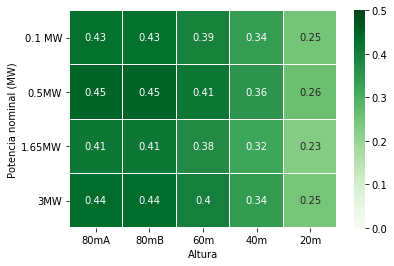

In [113]:
Extra_80A = np.reshape(factor_final3[0],(4,5))
sns.heatmap(Extra_80A,cmap="Greens",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)
plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

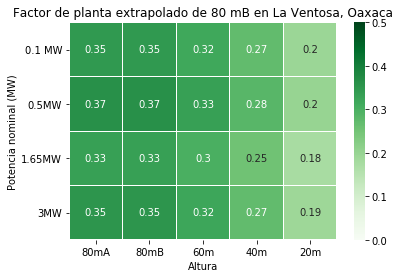

In [89]:
Extra_80B = np.reshape(factor_final3[1],(4,5))
sns.heatmap(Extra_80B,cmap="Greens",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)
plt.title("Factor de planta extrapolado de 80 mB en La Ventosa, Oaxaca",fontsize=12)
plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

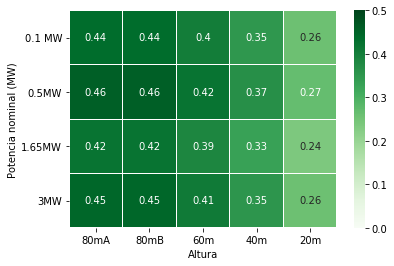

In [115]:
Extra_60 = np.reshape(factor_final3[2],(4,5))
sns.heatmap(Extra_60,cmap="Greens",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)

plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

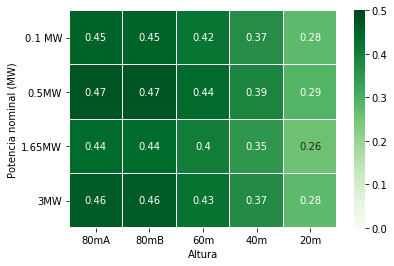

In [114]:
Extra_40 = np.reshape(factor_final3[3],(4,5))
sns.heatmap(Extra_40,cmap="Greens",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)

plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

Text(33.0, 0.5, 'Potencia nominal (MW)')

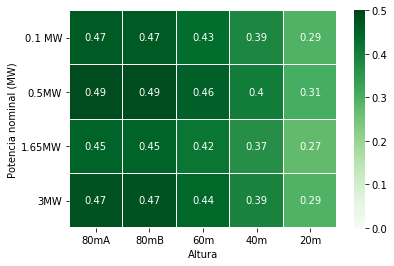

In [116]:
Extra_20 = np.reshape(factor_final3[4],(4,5))
sns.heatmap(Extra_20,cmap="Greens",annot=True,vmax=0.5,vmin=0, linewidths=.12)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5),("0.1 MW","0.5MW","1.65MW","3MW"),rotation=0)

plt.xlabel("Altura")
plt.ylabel("Potencia nominal (MW)") 

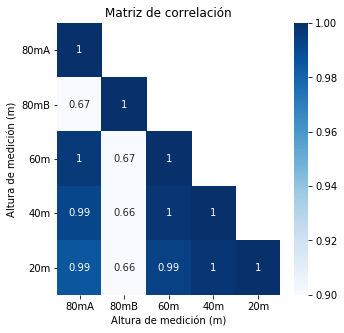

In [103]:
#Matriz de correlación de velocidades a diferentes alturas

new_cols = ['WS_80mA_mean','WS_80mB_mean','WS_60m_mean','WS_40m_mean','WS_20m_mean']

corr = DataVen[new_cols].corr()
mask = np.zeros_like(corr);
mask[np.triu_indices_from(mask,k=1)] = True;

plt.figure(figsize=(5,5))
sns.heatmap(corr, mask=mask,cmap='Blues',annot=True,vmax=1,vmin=0.9)
plt.xticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.yticks((0.5,1.5,2.5,3.5,4.5),('80mA','80mB','60m','40m','20m'),rotation=0)
plt.xlabel("Altura de medición (m)")
plt.ylabel("Altura de medición (m)")
plt.title("Matriz de correlación")

plt.show()